In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize':[10,6]})

In [27]:
data = pd.read_csv('ltrain.csv')


In [28]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_label
0,0.702,0.701,1,-8.724,1,0.0769,0.001560,0.9220,0.1120,0.2190,128.001,408750,4,1
1,0.875,0.907,4,-11.434,0,0.1660,0.016600,0.0000,0.3600,0.7430,188.010,340133,4,0
2,0.788,0.620,1,-8.117,1,0.0522,0.000009,0.8910,0.0792,0.0554,128.008,371148,4,1
3,0.739,0.872,11,-4.059,0,0.3330,0.021700,0.0000,0.2600,0.6840,190.168,238746,4,0
4,0.796,0.922,9,-8.882,0,0.1190,0.003780,0.8740,0.1100,0.2510,130.011,341038,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,0.596,0.973,11,-5.151,0,0.0706,0.000003,0.8690,0.0704,0.1110,139.995,609867,4,1
4783,0.736,0.848,1,-11.012,0,0.0428,0.009070,0.9080,0.0737,0.0391,128.006,469949,4,1
4784,0.654,0.750,8,-7.509,0,0.1050,0.244000,0.0178,0.1670,0.5570,185.546,272507,4,0
4785,0.745,0.630,1,-6.474,1,0.2120,0.016200,0.0000,0.4840,0.5100,193.918,165793,4,0


In [29]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_label
count,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000,4787.000000
mean,0.707160,0.723421,5.645916,-8.149476,0.550658,0.143136,0.117006,0.427042,0.180915,0.361400,146.303606,313687.591602,3.963860,0.494882
std,0.118878,0.168107,3.637997,2.870430,0.497479,0.123852,0.185777,0.430969,0.149959,0.257934,26.388446,108222.803329,0.304839,0.500026
min,0.197000,0.027900,0.000000,-26.172000,0.000000,0.022700,0.000001,0.000000,0.021900,0.018700,95.622000,38333.000000,1.000000,0.000000
25%,0.640000,0.614000,2.000000,-9.898000,0.000000,0.051400,0.002925,0.000000,0.099050,0.125000,127.016000,224366.500000,4.000000,0.000000
50%,0.725000,0.742000,6.000000,-7.980000,1.000000,0.078500,0.028600,0.171000,0.113000,0.322000,132.008000,306383.000000,4.000000,0.000000
75%,0.792000,0.856000,9.000000,-6.199000,1.000000,0.226000,0.148000,0.880000,0.206000,0.568000,171.205000,401555.500000,4.000000,1.000000
max,0.978000,1.000000,11.000000,-0.067000,1.000000,0.944000,0.978000,0.972000,0.973000,0.975000,206.247000,894386.000000,5.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4787 entries, 0 to 4786
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4787 non-null   float64
 1   energy            4787 non-null   float64
 2   key               4787 non-null   int64  
 3   loudness          4787 non-null   float64
 4   mode              4787 non-null   int64  
 5   speechiness       4787 non-null   float64
 6   acousticness      4787 non-null   float64
 7   instrumentalness  4787 non-null   float64
 8   liveness          4787 non-null   float64
 9   valence           4787 non-null   float64
 10  tempo             4787 non-null   float64
 11  duration_ms       4787 non-null   int64  
 12  time_signature    4787 non-null   int64  
 13  genre_label       4787 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 523.7 KB


In [31]:
def scale(x):
    return ((x-np.mean(x))/np.std(x))

In [32]:
xtrain=data.drop('genre_label',axis=1)
ytrain=data['genre_label']

In [33]:
xtrain

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.702,0.701,1,-8.724,1,0.0769,0.001560,0.9220,0.1120,0.2190,128.001,408750,4
1,0.875,0.907,4,-11.434,0,0.1660,0.016600,0.0000,0.3600,0.7430,188.010,340133,4
2,0.788,0.620,1,-8.117,1,0.0522,0.000009,0.8910,0.0792,0.0554,128.008,371148,4
3,0.739,0.872,11,-4.059,0,0.3330,0.021700,0.0000,0.2600,0.6840,190.168,238746,4
4,0.796,0.922,9,-8.882,0,0.1190,0.003780,0.8740,0.1100,0.2510,130.011,341038,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,0.596,0.973,11,-5.151,0,0.0706,0.000003,0.8690,0.0704,0.1110,139.995,609867,4
4783,0.736,0.848,1,-11.012,0,0.0428,0.009070,0.9080,0.0737,0.0391,128.006,469949,4
4784,0.654,0.750,8,-7.509,0,0.1050,0.244000,0.0178,0.1670,0.5570,185.546,272507,4
4785,0.745,0.630,1,-6.474,1,0.2120,0.016200,0.0000,0.4840,0.5100,193.918,165793,4


In [34]:
xtrain=scale(xtrain)
df=xtrain

In [35]:
xtrain

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.043412,-0.133386,-1.277187,-0.200173,0.903332,-0.534861,-0.621487,1.148597,-0.459607,-0.552140,-0.693657,0.878487,0.118565
1,1.412008,1.092149,-0.452471,-1.144382,-1.107012,0.184624,-0.540522,-0.990991,1.194354,1.479604,1.580644,0.244386,0.118565
2,0.680091,-0.615271,-1.277187,0.011315,0.903332,-0.734314,-0.629835,1.076658,-0.678357,-1.186478,-0.693391,0.531001,0.118565
3,0.267863,0.883927,1.471866,1.425188,-1.107012,1.533154,-0.513066,-0.990991,0.527434,1.250839,1.662431,-0.692547,0.118565
4,0.747394,1.181386,0.922055,-0.255223,-1.107012,-0.194902,-0.609536,1.037208,-0.472946,-0.428064,-0.617479,0.252750,-3.162197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,-0.935172,1.484796,1.471866,1.044718,-1.107012,-0.585733,-0.629871,1.025605,-0.737046,-0.970896,-0.239092,2.737042,0.118565
4783,0.242624,0.741146,-1.277187,-0.997350,-1.107012,-0.810219,-0.581058,1.116108,-0.715038,-1.249679,-0.693467,1.444037,0.118565
4784,-0.447228,0.158124,0.647150,0.223152,-1.107012,-0.307952,0.683655,-0.949684,-0.092801,0.758412,1.487260,-0.380557,0.118565
4785,0.318340,-0.555779,-1.277187,0.583763,0.903332,0.556076,-0.542675,-0.990991,2.021334,0.576176,1.804554,-1.366718,0.118565


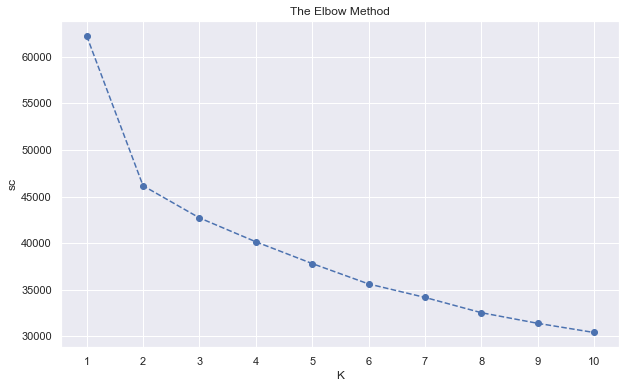

In [57]:
#applying elbow method to find optimal number of K clusters
sc = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 1)
    kmeans.fit(xtrain)
    sc.append(np.abs(kmeans.score(xtrain)))
plt.plot(list(range(1, 11)), sc,linestyle='--',marker='o')
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('sc')
plt.xticks(list(range(1, 11)))
plt.show()

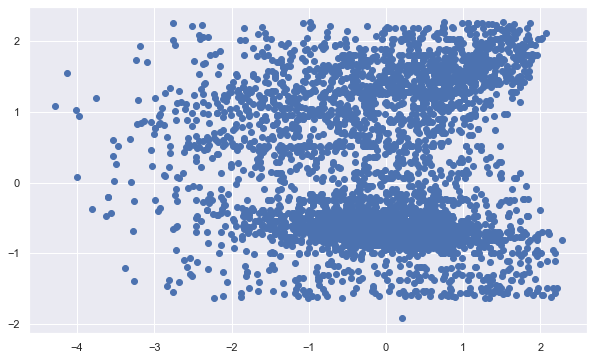

In [58]:
plt.scatter(xtrain['danceability'],xtrain['tempo'], label='True Position')
plt.show()

In [80]:
#applying k means alogrithm
#after applying elbow method we find that the best k is =3
kmeans = KMeans(n_clusters=2) 
kmeans.fit(xtrain)

KMeans(n_clusters=2)

In [81]:
KMeans

sklearn.cluster._kmeans.KMeans

In [82]:
labels = kmeans.predict(xtrain)
centroids = kmeans.cluster_centers_

In [83]:
labels

array([1, 0, 1, ..., 0, 0, 1])

In [84]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ",accuracy_score(ytrain,labels)*100)

Accuracy Score:  99.14351368289115


In [85]:
centroids

array([[-0.06732354, -0.40770437, -0.01848811,  0.40060234, -0.051352  ,
         0.61200699,  0.41694559, -0.95535623,  0.21544588,  0.64434213,
         0.65169859, -0.79353189,  0.05319515],
       [ 0.06820118,  0.41301927,  0.01872913, -0.40582466,  0.05202143,
        -0.61998521, -0.42238096,  0.96781042, -0.21825447, -0.65274188,
        -0.66019424,  0.8038765 , -0.05388861]])

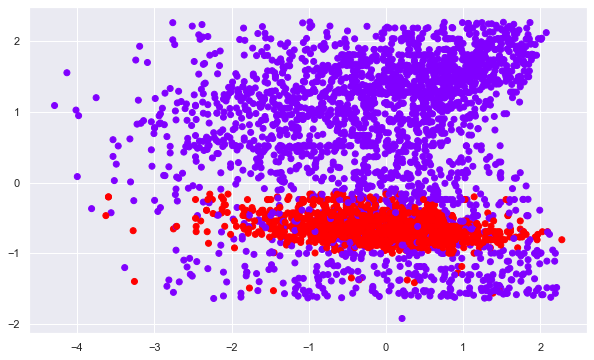

In [86]:
plt.scatter(xtrain['danceability'],xtrain['tempo'], c=labels, cmap='rainbow')


In [87]:
from mpl_toolkits.mplot3d import Axes3D

def plot_data(data, labels):
    
    fig = plt.figure();
    ax = Axes3D(fig)
    ax.scatter(xtrain['danceability'],xtrain['tempo'], xtrain['valence'], c=labels, cmap='rainbow');

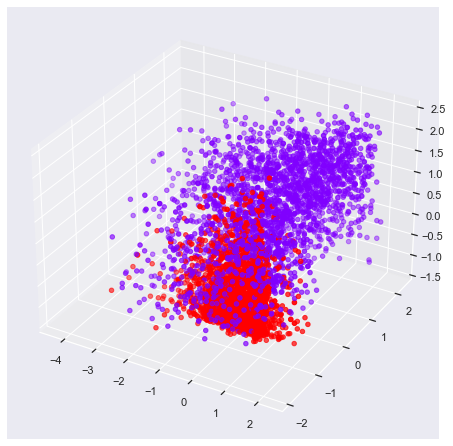

In [88]:
plot_data(data, labels)

*****